<b>Target :</b> To improve the overall perfromance of the model by including batch normalization<br>
<b>Results :</b> The train and test accuracies have hit the 99% benchmark<br>
<b>Analysis :</b> While the test and training accuracies have both increased, there is a possibility of overfitting in the last few epochs. I will try dopout next to address this issue

# Import Libraries

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## Data Transformations


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 9912422/9912422 [00:00<00:00, 358924937.79it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 101030603.69it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 119389773.28it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19321023.09it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Dataloader Arguments & Test/Train Dataloaders


In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# View sample images

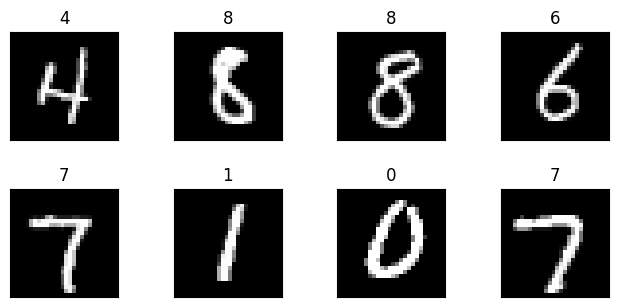

In [5]:
from utils import return_dataset_images

return_dataset_images(train_loader, 8)

# Model Params

In [6]:
from model_2 import Net, model_summary, model_train, model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,304
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7            [-1, 8, 24, 24]             128
         MaxPool2d-8            [-1, 8, 12, 12]               0
            Conv2d-9           [-1, 16, 10, 10]           1,152
             ReLU-10           [-1, 16, 10, 10]               0
      BatchNorm2d-11           [-1, 16, 10, 10]              32
           Conv2d-12             [-1, 16, 8, 8]           2,304
             ReLU-13             [-1, 16, 8, 8]               0
      BatchNorm2d-14             [-1, 1

# Training and Testing

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    model_train(model, device, train_loader, optimizer, criterion)
    model_test(model, device, test_loader, criterion)

Epoch 1


Train: Loss=0.0887 Batch_id=468 Accuracy=87.36: 100%|██████████| 469/469 [00:18<00:00, 24.76it/s]


Test set: Average loss: 0.1384, Accuracy: 9644/10000 (96.44%)

Epoch 2


Train: Loss=0.0247 Batch_id=468 Accuracy=97.86: 100%|██████████| 469/469 [00:17<00:00, 27.22it/s]


Test set: Average loss: 0.0576, Accuracy: 9851/10000 (98.51%)

Epoch 3


Train: Loss=0.0636 Batch_id=468 Accuracy=98.41: 100%|██████████| 469/469 [00:18<00:00, 24.99it/s]


Test set: Average loss: 0.0427, Accuracy: 9875/10000 (98.75%)

Epoch 4


Train: Loss=0.0834 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:17<00:00, 27.05it/s]


Test set: Average loss: 0.0424, Accuracy: 9883/10000 (98.83%)

Epoch 5


Train: Loss=0.0149 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:18<00:00, 25.44it/s]


Test set: Average loss: 0.0411, Accuracy: 9874/10000 (98.74%)

Epoch 6


Train: Loss=0.0321 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:17<00:00, 27.14it/s]


Test set: Average loss: 0.0405, Accuracy: 9885/10000 (98.85%)

Epoch 7


Train: Loss=0.0186 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:18<00:00, 25.73it/s]


Test set: Average loss: 0.0417, Accuracy: 9872/10000 (98.72%)

Epoch 8


Train: Loss=0.0132 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:17<00:00, 27.16it/s]


Test set: Average loss: 0.0329, Accuracy: 9894/10000 (98.94%)

Epoch 9


Train: Loss=0.0106 Batch_id=468 Accuracy=99.17: 100%|██████████| 469/469 [00:17<00:00, 26.46it/s]


Test set: Average loss: 0.0426, Accuracy: 9870/10000 (98.70%)

Epoch 10


Train: Loss=0.0175 Batch_id=468 Accuracy=99.24: 100%|██████████| 469/469 [00:17<00:00, 26.87it/s]


Test set: Average loss: 0.0319, Accuracy: 9901/10000 (99.01%)

Epoch 11


Train: Loss=0.0124 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:18<00:00, 25.80it/s]


Test set: Average loss: 0.0305, Accuracy: 9906/10000 (99.06%)

Epoch 12


Train: Loss=0.0468 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:17<00:00, 26.75it/s]


Test set: Average loss: 0.0305, Accuracy: 9902/10000 (99.02%)

Epoch 13


Train: Loss=0.0255 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:18<00:00, 25.93it/s]


Test set: Average loss: 0.0319, Accuracy: 9903/10000 (99.03%)

Epoch 14


Train: Loss=0.0113 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:18<00:00, 25.40it/s]


Test set: Average loss: 0.0322, Accuracy: 9892/10000 (98.92%)

Epoch 15


Train: Loss=0.0183 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:17<00:00, 26.62it/s]


Test set: Average loss: 0.0330, Accuracy: 9893/10000 (98.93%)



# Graphs

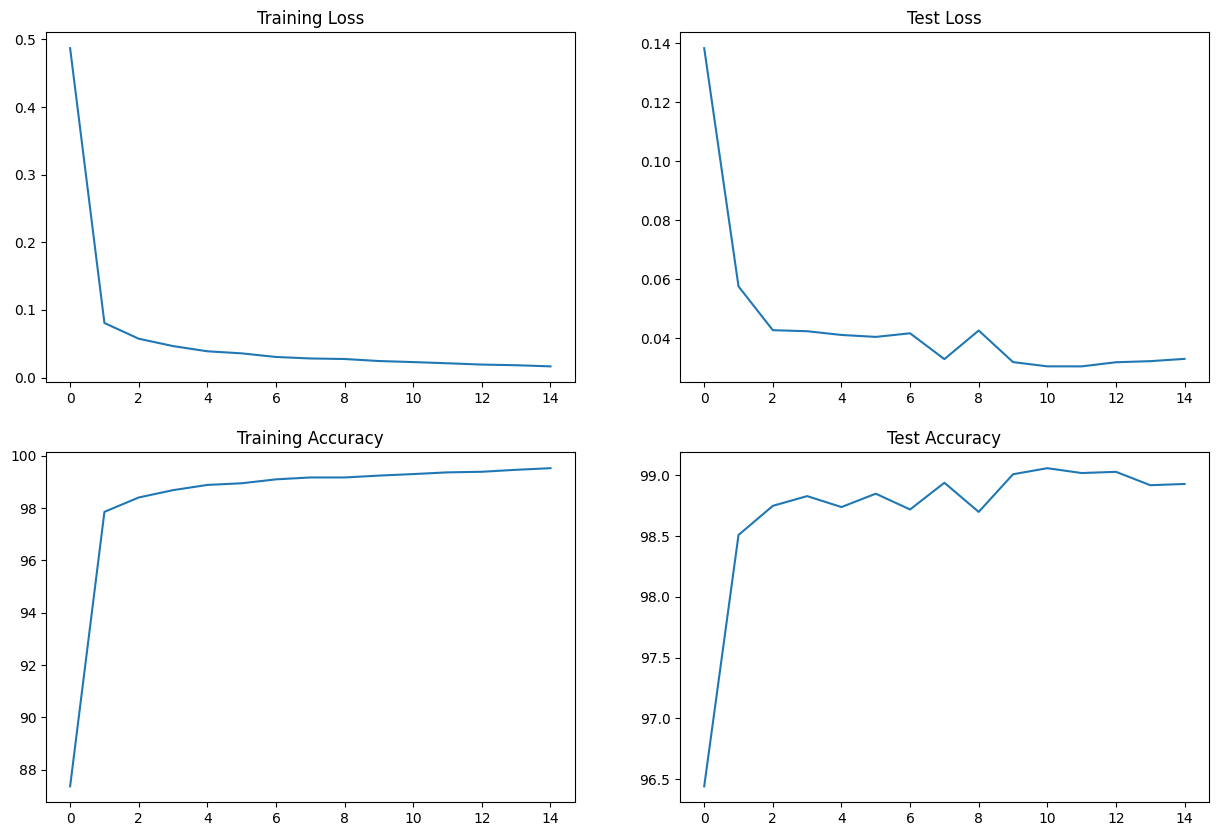

In [8]:
from model_2 import draw_graphs

draw_graphs()